<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Session_11_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python </font> </u> </h1> </center>

#Session-11: Logistic Regression and SVM


###Objective: 
 1. *Apply logistic regression algorithm for classification .*
 2. *Learn how to use SVM algorithm for image classficaiton.*
 



In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

##Dataset

In [ ]:
# Download the data
!wget -O iris.csv https://www.dropbox.com/s/2763sz3gp8b7qn4/Iris.csv?dl=0

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:

  -- Iris Setosa

  -- Iris Versicolour
  
  -- Iris Virginica

In [ ]:
# Check Column 

dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# sepearte the feature variables and output variable

# features
feature = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] 

# target variable
labels = dataset[['Species']]   

In [ ]:
feature

In [ ]:
# flower categories

class_names = dataset['Species'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##Splitting the Dataset

In [ ]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,labels,test_size = 0.25,random_state = 0)

# random_state = 0 is select to get the same result

In [ ]:
print("Training Set Size: ",X_train.shape)
print("Test Set Size: ", X_test.shape)

Training Set Size:  (112, 4)
Test Set Size:  (38, 4)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

# training
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction / testing

y_pred = lr.predict(X_test)

In [ ]:
# Making confusing matrix (actual,prediction)

confusion_matrix(y_test,y_pred,)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



#Stroke Prediction Dataset


**Context**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient


**Task**

Can you predict whether a patient is likely to get stroke?

In [ ]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

In [ ]:
"""importing the dataset """

dataset = pd.read_csv('stroke-data.csv')
dataset

# Import the libraries

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

##Handwritten Character Dataset

In [ ]:
# Download the train data
!wget -O mnist_train.csv https://www.dropbox.com/s/yrqwhkqj8914h9l/mnist_train.csv?dl=0

In [ ]:
# Download the test data
!wget -O mnist_test.csv https://www.dropbox.com/s/3c02b49hcze40i6/mnist_test.csv?dl=0

In [ ]:
"""importing the dataset """

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# print first five row
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the first column 
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0:1]
train_labels

#train_images

In [ ]:
# count the labels distribution
train_labels.value_counts()

label
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

In [ ]:
# drop the first column 
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0:1]
test_labels

#test_images

,label
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print("Training Set: ",train_images.shape)
print("Test Set: ", test_images.shape)

Training Set:  (60000, 784)
Test Set:  (10000, 784)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(test_images,test_labels,test_size = 0.25,random_state = 0)
print("Training Set: ",X_train.shape)
print("Test Set: ", X_test.shape)

Training Set:  (7500, 784)
Test Set:  (2500, 784)


In [ ]:
class_names = np.unique(train_labels).tolist()

## Plotting some digits

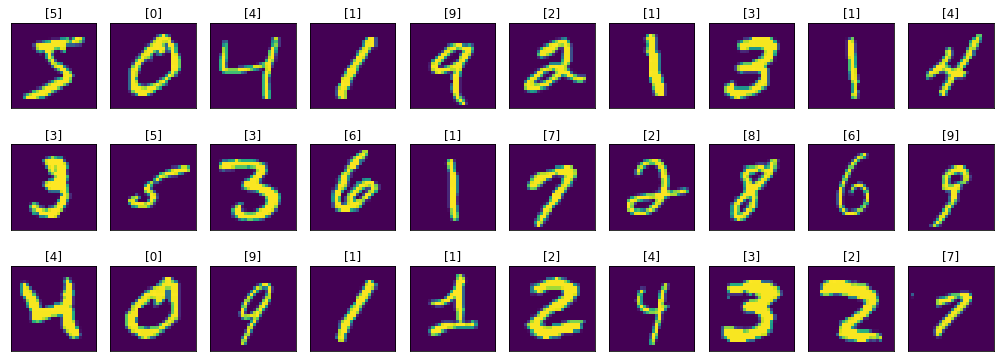

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_images.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{train_labels.iloc[digit_num].values}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

##Normalizing

In [ ]:
# Normalizing data .. Normilization was found better in this dataset than Standardization
# Normilization between (0, 1) was tested vs (-1, 1) and (-1, 1) showed better results

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

#Support Vector Machine (SVM)

In [ ]:
# Trainging the SVC model with gamma and C found in previous step
# gamma=0.00728932024638, C=2.82842712475

classifier = svm.SVC()
classifier.fit(normalized_X_train, y_train)

# Calculating the training accuracy (to measure the bias)
train_accuracy = classifier.score(normalized_X_train, y_train)
print (f"Training Accuracy: {train_accuracy*100:.3f}%")



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 98.720%


In [ ]:
# Getting predictions 
predictions = classifier.predict(normalized_X_test)

In [ ]:
# Making confusing matrix (actual,prediction)

confusion_matrix(y_test,predictions)

array([[258,   0,   2,   1,   0,   0,   1,   0,   0,   0],
       [  0, 294,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 238,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   1, 260,   0,   5,   0,   1,   1,   1],
       [  1,   1,   1,   0, 255,   0,   3,   0,   1,   5],
       [  3,   0,   0,   2,   0, 201,   1,   0,   1,   0],
       [  1,   0,   1,   0,   0,   1, 229,   0,   1,   0],
       [  0,   3,   5,   0,   1,   0,   0, 215,   1,   6],
       [  0,   0,   3,   3,   2,   2,   0,   2, 236,   1],
       [  3,   2,   0,   2,   4,   0,   1,   2,   0, 231]])

In [ ]:
# it is used to check the accuracy of the classification
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       262
           1       0.98      0.99      0.99       296
           2       0.94      0.99      0.97       240
           3       0.97      0.97      0.97       269
           4       0.97      0.96      0.96       267
           5       0.96      0.97      0.96       208
           6       0.97      0.98      0.98       233
           7       0.97      0.93      0.95       231
           8       0.98      0.95      0.96       249
           9       0.95      0.94      0.94       245

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500



##Predictions

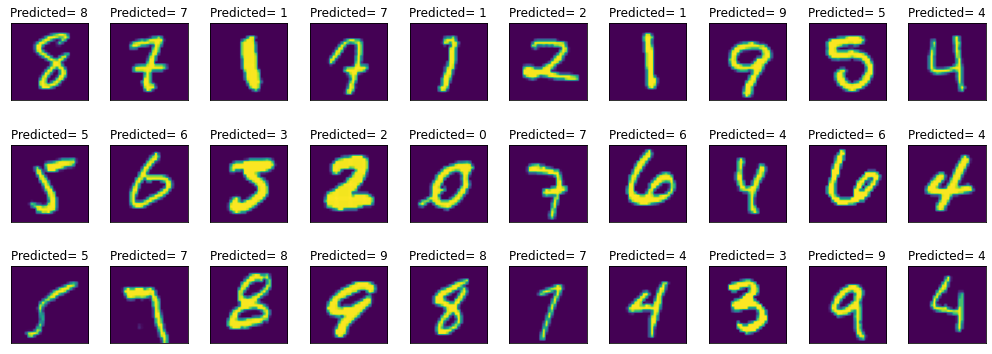

In [ ]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_test.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted= {predictions[digit_num]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

## Misclassified Samples

In [ ]:
# add the predicted result into the y_test column 

y_test['predicted'] = predictions
y_test


In [ ]:
index = y_test.index.tolist()

# find the mis classified image indexes

mis_clas = list()

for i in index:
  if y_test['label'][i] != y_test['predicted'][i]:
    mis_clas.append(i)
mis_clas    

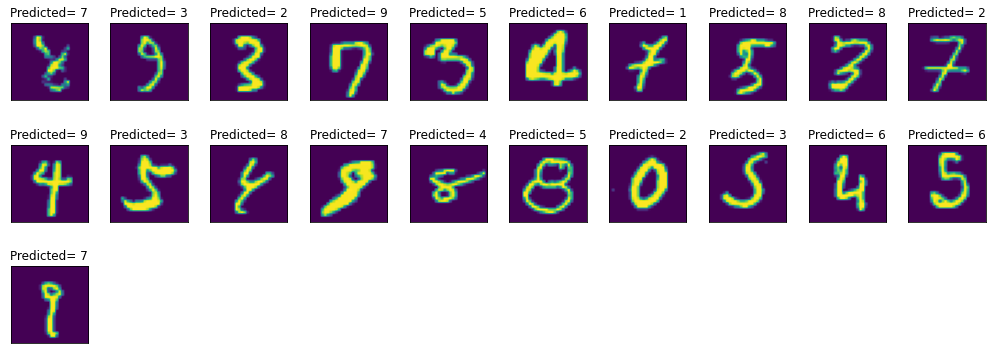

In [ ]:
# Plotting some misclassified digits
plt.figure(figsize=(14,12))
for i,img in enumerate(mis_clas[0:21]):
    plt.subplot(7,10,i+1)
    grid_data = X_test.loc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted= {y_test['predicted'].loc[img]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()


# Bangla Handwritten Character Dataset



**Ekush: A Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features:**

 - Characters Recognition
 - Recognition in context
 - Gender Identification
 - Forensic Investigation
 - 673,482‬ character instances
 - 242 character class
 - 4 captions per image
 - 340,243‬ Female data
 - 333,239‬ Male data

In [ ]:
# run the cell to download the data
!wget -O ekush.zip https://www.dropbox.com/s/sym70dkootl09va/ekushCSV.zip?dl=0


In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("ekush.zip", 'r')
zip_ref.extractall("bangla-digit")
zip_ref.close()

#Reference


1.   [SuperDataScience](https://www.superdatascience.com/pages/machine-learning)

